In [1]:
import numpy as np
import pandas as pd
from keras.datasets import imdb
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten, Dropout,TimeDistributed
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


### Q1 : Importing and analysing the data
##### Using imdb.load_data() method
##### Getting train and test set
##### Taking 10000 most frequent words

In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000)

In [4]:
print("Classes: Y_train")
print(np.unique(y_train))
print("Classes: Y_test")
print(np.unique(y_test))

Classes: Y_train
[0 1]
Classes: Y_test
[0 1]


C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

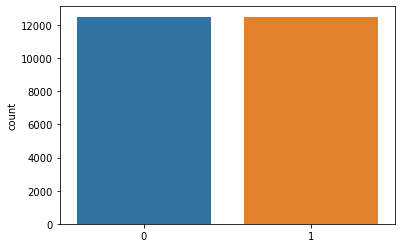

In [5]:
sns.countplot(y_train)

C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

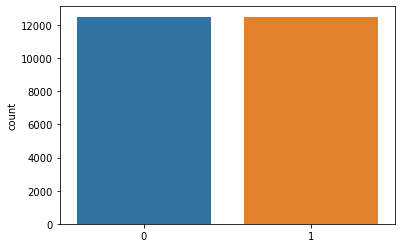

In [6]:
sns.countplot(y_test)

In [7]:
print("Total number of words in reviews_train: ")
print(len(np.unique(np.hstack(X_train))))
print("Total number of words in reviews_test: ")
print(len(np.unique(np.hstack(X_test))))

Total number of words in reviews_train: 
9998
Total number of words in reviews_test: 
9951


###### Q2. Performing relevant sequence adding on the data

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [9]:
X_train = pad_sequences(X_train, maxlen = 300)
X_test =  pad_sequences(X_test, maxlen = 300)

#### Q3. Perform following data analysis:
##### • Print shape of features and labels
##### • Print value of any one feature and it's label

In [10]:
print('Features:','Train_shape',X_train.shape,'Test_shape',X_test.shape)

Features: Train_shape (25000, 300) Test_shape (25000, 300)


In [11]:
print ('Labels:','Train_shape',y_train.shape,'Test_shape',y_test.shape)

Labels: Train_shape (25000,) Test_shape (25000,)


In [12]:
print('Feature Value:',X_train[10])
print('Label Value:',y_train[10])

Feature Value: [   6  346  137   11    4 2768  295   36 7740  725    6 3208  273   11
    4 1513   15 1367   35  154    2  103    2  173    7   12   36  515
 3547   94 2547 1722    5 3547   36  203   30  502    8  361   12    8
  989  143    4 1172 3404   10   10  328 1236    9    6   55  221 2989
    5  146  165  179  770   15   50  713   53  108  448   23   12   17
  225   38   76 4397   18  183    8   81   19   12   45 1257    8  135
   15    2  166    4  118    7   45    2   17  466   45    2    4   22
  115  165  764 6075    5 1030    8 2973   73  469  167 2127    2 1568
    6   87  841   18    4   22    4  192   15   91    7   12  304  273
 1004    4 1375 1172 2768    2   15    4   22  764   55 5773    5   14
 4233 7444    4 1375  326    7    4 4760 1786    8  361 1236    8  989
   46    7    4 2768   45   55  776    8   79  496   98   45  400  301
   15    4 1859    9    4  155   15   66    2   84    5   14   22 1534
   15   17    4  167    2   15   75   70  115   66   30  252  

##### Q4. Decoding the feature value to get original sentence.

In [13]:
word_index_dict = imdb.get_word_index()

In [14]:
for encoding in X_train[0]:
  for key, value in word_index_dict.items():
    if encoding == value:
      print(key, end = " ")

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw

In [15]:
y_train[0]

1

##### Q5. Design, train, tune and test a sequential model. 
###### Model Architecture 

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dense, TimeDistributed

model = Sequential()
model.add(Embedding(input_dim = 10000, output_dim = 100, input_length = 300))
model.add(LSTM(64, activation = 'relu', return_sequences=True))

model.add(TimeDistributed(Dense(100)))

model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

##### Model Compilation

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

##### Model summary

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 300, 64)           42240     
_________________________________________________________________
time_distributed (TimeDistri (None, 300, 100)          6500      
_________________________________________________________________
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              30721024  
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               1

##### Training the Model

In [19]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 261s 10ms/sample - loss: 0.3810 - accuracy: 0.8118 - val_loss: 0.2727 - val_accuracy: 0.8847
Epoch 2/5
25000/25000 [==============================] - 265s 11ms/sample - loss: 0.1864 - accuracy: 0.9293 - val_loss: 0.3047 - val_accuracy: 0.8733
Epoch 3/5
25000/25000 [==============================] - 288s 12ms/sample - loss: 0.0967 - accuracy: 0.9642 - val_loss: 0.4785 - val_accuracy: 0.8661
Epoch 4/5
25000/25000 [==============================] - 681s 27ms/sample - loss: 0.0378 - accuracy: 0.9854 - val_loss: 0.5828 - val_accuracy: 0.8614
Epoch 5/5
25000/25000 [==============================] - 295s 12ms/sample - loss: 0.0168 - accuracy: 0.9948 - val_loss: 0.7030 - val_accuracy: 0.8598


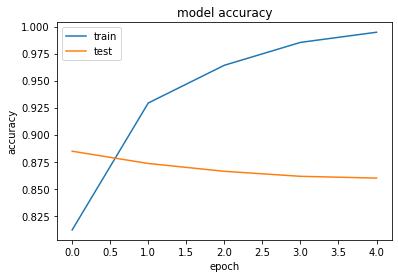

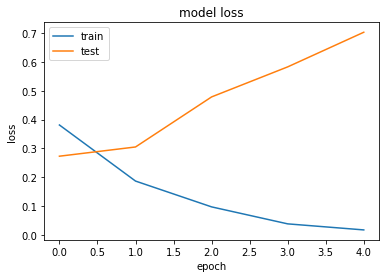

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### Evaluating model 

In [21]:
score = model.evaluate(X_test, y_test)
print("Loss: {}, Accuracy:{}".format(score[0], score[1]))

25000/25000 [==============================] - 100s 4ms/sample - loss: 0.7030 - accuracy: 0.8598
Loss: 0.7029744073975086, Accuracy:0.8597999811172485


##### Prediction and Classification Report

In [22]:
y_pred = model.predict(X_test)

In [23]:
y_pred[:10]

array([[3.6652198e-01],
       [1.0000000e+00],
       [9.9945408e-01],
       [3.2195315e-01],
       [9.9999988e-01],
       [3.1231269e-02],
       [8.8064986e-01],
       [3.0179383e-08],
       [6.0995036e-01],
       [9.9999988e-01]], dtype=float32)

In [24]:
# Converting probabilities into class
y_pred = np.round(y_pred).astype(int)
y_pred[:5]

array([[0],
       [1],
       [1],
       [0],
       [1]])

In [25]:
print(classification_report(y_test, y_pred, target_names = ['Bad Reviews','Good Reviews']))

              precision    recall  f1-score   support

 Bad Reviews       0.84      0.89      0.86     12500
Good Reviews       0.88      0.83      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [26]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[11084  1416]
 [ 2089 10411]]


Text(69.0, 0.5, 'Actual')

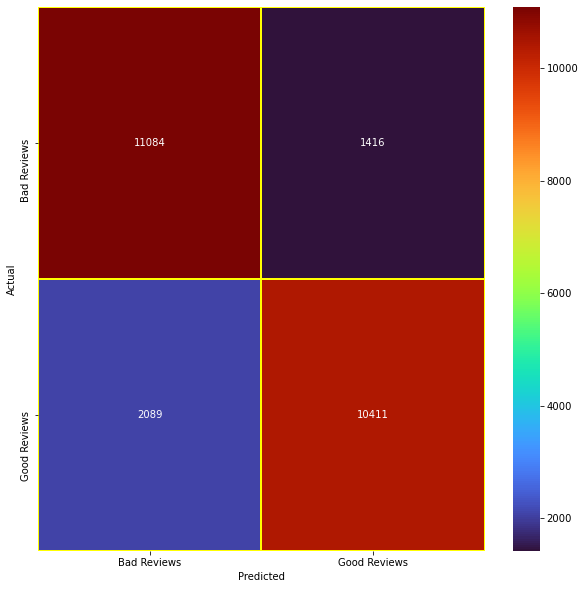

In [27]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "turbo",
            linecolor = 'yellow', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Bad Reviews','Good Reviews'], 
            yticklabels = ['Bad Reviews','Good Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

##### Predicting on one sample 

In [28]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in X_test[0]] )

In [29]:
print("Encoded Features: ")
print(X_test[10])
X_test_sample = " ".join( [reverse_index.get(i - 3, "#") for i in X_test[10]] )
print("Deccoded Review: ")
print(X_test_sample)
print("Actual Label: ")
print(y_test[10])
print("Predicted Label: ")
print(y_pred[10])

Encoded Features: 
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    1 1581   34 7908 5082   23    6
 1374 1120    7  107  349    2 1496   11 5116   18  397 3767    7    4
  107   84 6763   56   68  456 1402    2   39    4 1374    9   35  204
    5   55 4412  212  193   23    4  326   45    6 1109    8 1738    2
   15   29  199 1040    5 2684   11   14 1403  212 1528   10   10 2160
    2    9    4  452   37    2    4  598  425    5   45 4394  138   59
  214  467    4 2391    7 1738    2   19   41 2455 3028    5 6866 1489
   90  180   18  101 1403    2 1514 5257    9    4  564  8

In [30]:
model.predict(X_test[0].reshape((1, 300)))

array([[0.3665218]], dtype=float32)